<a href="https://colab.research.google.com/github/shiraswis/Final-Project-Bioinformatics/blob/main/final_big_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys
from sklearn import datasets

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls gdrive/MyDrive/bioinformatic  # use !ls to navigate in your drive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ls: cannot access 'gdrive/MyDrive/bioinformatic': No such file or directory


# data

In [11]:
df_all=pd.read_csv('gdrive/MyDrive/ColabNotebooks/bigProject/mymol_final.csv')
df_all

,Ligand,Affinity I (nM),"Kd, Ki, or IC50",organisem,type,organisem+type,Class,SMILES,#C,#N,#O,#=,O start,O end,N start,N end,O/N start or end,Mw (no hydrogens),data,classify
0,Nω-Hydroxylysine,11000,IC50,Bovine,arginase I,Bovine liver arginase,Good binder,ONCCCCC(N)C(=O)O,6,2,3,1,1,1,0,0,2,148,"6,2,3,1,2,148",1
1,Indole-3-propionic,2800000,IC50,Bovine,arginase I,Bovine liver arginase,Medium binder,C1=CC=C2C(=C1)C(=CN2)CCC(=O)O,11,1,2,5,0,1,0,0,1,178,"11,1,2,5,1,178",2
2,Tryptamine,3200000,IC50,Bovine,arginase I,Bovine liver arginase,Medium binder,C1=CC=C2C(=C1)C(=CN2)CCN,10,2,0,4,0,0,0,1,1,148,"10,2,0,4,1,148",2
3,Indole-3-L-lactic,3400000,IC50,Bovine,arginase I,Bovine liver arginase,Medium binder,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)O,11,1,3,5,0,1,0,0,1,194,"11,1,3,5,1,194",2
4,5-Hydroxy-L-tryptophane,3900000,IC50,Bovine,arginase I,Bovine liver arginase,Medium binder,O=C(O)[C@@H](N)Cc2c1cc(O)ccc1[nH]c2,11,1,3,5,1,0,0,0,1,194,"11,1,3,5,1,194",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Uric acid (96),9000,ki,Bovine,arginase I,Bovine liver arginase,Good binder,C12=C(NC(=O)N1)NC(=O)NC2=O,5,4,3,4,0,1,0,0,1,164,"5,4,3,4,1,164",1
123,Cytosine (97),9000,ki,Bovine,arginase I,Bovine liver arginase,Good binder,C1=C(NC(=O)N=C1)N,4,3,1,3,0,0,0,1,1,106,"4,3,1,3,1,106",1
124,Cytidine (98),5000,ki,Bovine,arginase I,Bovine liver arginase,Good binder,C1=CN(C(=O)N=C1N)[C@H]2[C@@H]([C@@H]([C@H](O2)...,9,3,5,3,0,1,0,0,1,230,"9,3,5,3,1,230",1
125,c(99),17000,ki,Leishmania,NaN,NaN,Good binder,Cc2cc(NNC(N)=S)n1nc(C(F)(F)F)nc1c2,9,3,0,4,0,0,0,0,0,150,"9,3,0,4,0,150",1


# ML

In [ ]:

from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn import tree
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
x=df_all["data"]
labels = df_all['classify']
features=[]
df_pred=[]
for t in x:
  temp=t.split(',')
  features.append([int(i) for i in temp])
features
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.20,random_state=0)#split
sum_acc=0
for j in range(0,10):
  clf = tree.DecisionTreeClassifier()
  clf=clf.fit(features_train,labels_train)
  labels_pred=clf.predict(features_test)
  sum_acc+=accuracy_score(labels_test,labels_pred)
  df_pred.append(labels_pred)
print(sum_acc/10)

0.8423076923076922


In [ ]:
print(labels_test.index)
index =['pred 1','pred 2','pred 3','pred 4','pred5','pred6','pred7','pred8','pred9','pred10']
temp=pd.DataFrame(df_pred,columns=labels_test.index,index=index)
temp=temp.T
temp
temp["class"]=pd.DataFrame(labels_test)


In [ ]:
names=[]
for i in labels_test.index:
  names.append(df_all["Ligand"][i])

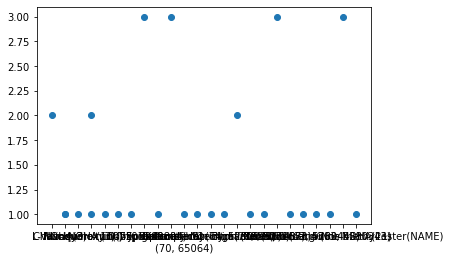

In [ ]:
x=names
y=temp["class"]
plt.scatter(x, y)
 
plt.show()

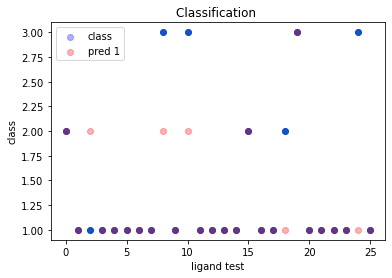

In [ ]:
x=[]
for i in range(0,len(temp["class"])):
  x.append(i)
y1=temp["class"]
y2=temp["pred 1"]
plt.scatter(x, y)
plt.title('Classification ')
plt.xlabel('ligand test')
plt.ylabel('class')
plt.scatter(x, y1, label='class',alpha=0.3,color='blue')
plt.scatter(x, y2, label='pred 1',alpha=0.3,color='red')
plt.legend(loc='best')

 
plt.show()

In [ ]:
print(pd.DataFrame(labels_test))

     classify
8           2
51          1
126         1
24          1
40          1
100         1
73          1
48          1
7           3
71          1
10          3
98          1
78          1
92          1
105         1
2           2
101         1
85          1
22          2
89          3
59          1
95          1
66          1
91          1
16          3
30          1


In [ ]:

t=pd.DataFrame(labels_test)
t.to_csv('gdrive/MyDrive/bioinformatic/BigProject/mol_class_prediction1.csv')
t

,classify
8,2
51,1
126,1
24,1
40,1
100,1
73,1
48,1
7,3
71,1
